# 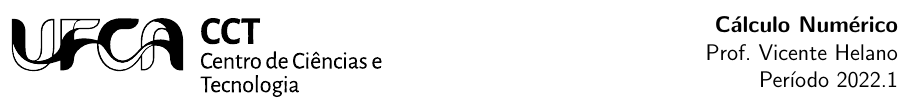

# Projeto 1
*Resolvendo o Termo com o auxílio da SVD*

### **Nome:** _(Henrique de Sousa Alencar Coelho)_

Um jogo online bastante acessado ultimamente é o [Termo](https://term.ooo/).
Desenvolvido pelo engenheiro de software Josh Wardle, o jogo é uma espécie de presente de Wardle para sua esposa, também apaixonada por este tipo de coisa. Na sua versão em inglês, ele é conhecido como *Wordle*.
Ele é um jogo de adivinhação, onde a ideia é dar palpites até descobrir uma palavra secreta.
Dois grandes diferenciais do jogo são: ele é gratuito e livre de qualquer tipo de propaganda e (ii) uma palavra secreta nova surge a cada dia, o que gera bastante expectativa entre seus usuários.

O Termo é um jogo individual.
Você pode jogar com uma, duas ou quatro palavras secretas simultâneas.
Cada palavra secreta possui sempre 5 letras.
Embora o jogo não dê pistas, você pode demorar o tempo que quiser em cada partida.

O jogador deve descobrir uma palavra secreta em até 6 tentativas.
Por simplicidade, os acentos são preenchidos automaticamente, e por isso não são considerados nos palpites.
As palavras podem possuir letras repetidas.
O histórico das tentativas efetuadas fica sempre visível para o usuário, o que o ajuda a conferir quais letras ele acertou ou deixou de acertar.
As letras são exibidas em caixas.
Após digitar um palpite e teclar `Enter`,
as caixas são coloridas em verde, amarelo ou preto, segundo o seguinte critério.
Uma caixa é pintada de verde sempre que uma letra do palpite coincidir com uma letra da palavra secreta.
Quando uma letra do palpite existir na palavra secreta, mas estiver em uma posição diferente da esperada, a caixa é colorida de amarelo.
Uma caixa é mantida preta quando sua letra correspondente não pertencer à palavra secreta.

Neste contexto, a álgebra linear se encaixará como uma luva.
Imagine o conjunto $P$ dos possíveis palpites como um espaço vetorial.
A ideia é identificar um vetor $p$ que melhor represente $P$.
Como fazer isso? Iremos aplicar o [*teorema da aproximação de posto baixo*](https://pt.wikipedia.org/wiki/Aproxima%C3%A7%C3%A3o_de_posto_baixo) que estudamos em sala.

## Metodologia

(a) Primeiramente, você deve ler o artigo [*Rank One Approximation as a Strategy for Wordle*](https://arxiv.org/abs/2204.06324), de Michael Bonthron. Ele descreve uma metodologia para resolver o Termo usando decomposição em valores singulares. Você deve descrever abaixo a metodologia proposta, desde o esquema de representação das palavras até o algoritmo proposto pelo autor. Utilize uma célula de texto para cada parágrafo.

*Descreva a metodolgia a partir daqui*

Começamos usando uma lista das palavras da língua portuguesa que tem 5 letras, salvamos em uma lista e montamos um vetor com base em cada palavra, o vetor vai ter 130 elementos com base nas 26 letras do alfabeto e das 5 letras de cada palavra, as 26 primeiras posições ficará reservada para a primeira letra e as proximas 26 posições para a segunda letra e assim por diante, e depois montamos uma matriz com o vetor de todas as palavras procuramos os palpites com base na decomposição SVD e repetimos o procedimento eliminando as palavras que não são com base na resposta do jogo até que a palavra seja acertada.

## Construção do espaço dos palpites

(b) Para construir o espaço inicial de palpites, utilize o arquivo: http://natura.di.uminho.pt/download/sources/Dictionaries/libreoffice/oo3x-pt_PT.oxt

In [ ]:
# Lista das palavras
with open("palavrasde5letras.txt", "r") as arquivo:
  palavrasde5letras = arquivo.readlines()

In [3]:
# Digite seu código aqui
import numpy as np

# Tranforma uma string em um vetor
def criar_vetor(palavra):
  x = np.zeros(130)
  i = 0
  for p in palavra:
    letra = ord(p)
    if (letra == 10 or len(palavra) == 11):
      break
    x[letra-97 + 26*i] = 1
    i = i + 1
  return x

In [47]:
# Montando a Matriz com todos os vetores de acordo com as palavras da lista
A = np.zeros((130,np.shape(palavrasde5letras)[0]))

i = 0
for p in palavrasde5letras:
  if len(p) != 6:
    continue
  x = criar_vetor(p)
  A[:,i] = x
  i = i + 1

In [49]:
# Montando a Matriz com todos os vetores de acordo com as palavras da lista
A = np.zeros((130,np.shape(palavrasde5letras)[0]))

i = 0
for p in palavrasde5letras:
  if len(p) != 6:
    continue
  x = criar_vetor(p)
  A[:,i] = x
  i = i + 1

In [50]:
A

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(130, 5481))

## Uma primeira aproximação

(c) Empregando a métrica de similaridade descrita no artigo, qual palavra melhor aproxima o espaço de palpites inicial?

In [53]:
# Digite seu código aqui

# Decomposição SVD
B = A.copy()

U,s,V = np.linalg.svd(B)
S = np.diag(s)
u1 = U[:,0]

# Tranforma um vetor em uma string
def retorna_palavra(vetor):
  x = ""
  i = 0
  indice = 0
  for p in vetor:
    if p == 1:
      x = x + chr((indice - 26*i) + 97)
      i = i + 1
    indice = indice + 1
  return x

In [54]:
# Retorna uma lista com os vetores ordenados de acordo com a aproximação da primeira coluna do U
def sugestoes(palpite, M):
  x = []
  for i in range(np.shape(M)[1]):
    p = M[:,i]
    theta = np.arccos((np.inner(palpite,p))/((np.linalg.norm(palpite))*(np.linalg.norm(p))))
    x.append([theta,p])
  x.sort(key = lambda x: x[0])
  return x
sugest = sugestoes(u1, A)


# Os 5 primeiros palpites
palpites = []
cont = 0
for i in sugest:
  if cont >= 5:
    break
  r = retorna_palavra(i[1])
  palpites.append(r)
  cont = cont + 1
palpites

['caras', 'paras', 'saras', 'raras', 'coras']

## Vencendo o jogo

(d) Agora, você deve implementar uma função que forneça palpites para um jogador de Termo baseada **apenas** na metodologia descrita no artigo em estudo. Teste sua função jogando a versão original do jogo em: https://term.ooo/

In [55]:
# Digite seu código aqui
def palpites(palavra = "", cores = "", M = A):
    # Primeira Aproximação
  if palavra == "":
    B = M.copy()
    U,s,V = np.linalg.svd(B)
    S = np.diag(s)
    u1 = U[:,0]
    sugest = sugestoes(u1, B)
    palpites = []
    cont = 0
    for i in sugest:
      if cont >= 5:
        break
      r = retorna_palavra(i[1])
      palpites.append(r)
      cont = cont + 1
    return B, palpites
    # Próximas aproximações
  else:
    vetor = criar_vetor(palavra)
    B = M.copy()
    colunas = np.shape(B)[1]
    letusa = ""
    # Limpando a matriz com base no v
    for j in range(5):
      cont = 0
      if cores[j] == "v":
        while cont < colunas:
          v = B[:, cont]
          p = retorna_palavra(v)
          if palavra[j] != p[j]:
            B = np.delete(B, [cont], axis=1)
          else:
            cont = cont + 1
          colunas = np.shape(B)[1]
        letusa = letusa + palavra[j]

    # Limpando a matriz com base no a
    for j in range(5):
      cont = 0
      if palavra[j] in letusa:
        continue
      if cores[j] == "a":
        while cont < colunas:
          v = B[:, cont]
          p = retorna_palavra(v)
          if palavra[j] not in p:
            B = np.delete(B, [cont], axis=1)
          else:
            cont = cont + 1
          colunas = np.shape(B)[1]
        cont = 0
        while cont < colunas:
          v = B[:, cont]
          p = retorna_palavra(v)
          if palavra[j] == p[j]:
            B = np.delete(B, [cont], axis=1)
          else:
            cont = cont + 1
          colunas = np.shape(B)[1]
        letusa = letusa + palavra[j]

    # Limpando a matriz com base no c
    for j in range(5):
      cont = 0
      if palavra[j] in letusa:
        continue
      if cores[j] == "c":
        while cont < colunas:
          v = B[:, cont]
          p = retorna_palavra(v)
          if palavra[j] in p:
            B = np.delete(B, [cont], axis=1)
          else:
            cont = cont + 1
          colunas = np.shape(B)[1]
        letusa = letusa + palavra[j]

    # Decomposição SVD
    U,s,V = np.linalg.svd(B)
    S = np.diag(s)
    u1r = U[:,0]

    # Sugestões
    sugest = sugestoes(u1r, B)
    palpites = []
    cont = 0
    for i in sugest:
      if cont >= 5:
        break
      r = retorna_palavra(i[1])
      palpites.append(r)
      cont = cont + 1

    return B, palpites


In [56]:
print("Primeiros Palpites: ")
V = palpites()
print(V[1])
while True:
    palavra = input("Digite a palavra:")
    if len(palavra) != 5:
        print(f'Opção {palavra} inválida')
        continue
    print("Digite 'c' se a posição da letra for cinza")
    print("Digite 'a' se a posição da letra for amarelo")
    print("Digite 'v' se a posição da letra for verde")
    print()
    cor = ""
    i = 0
    while i < 5:
        print(f'letra: {palavra[i]}')
        c = input("Cor:")
        if c != "v" and c != "a" and c != "c":
            print(f'Opção {c} inválida')
            continue
        cor = cor + c
        i = i + 1
    V = palpites(palavra, cor, V[0])
    print(V[1])
    if cor == "vvvvv":
        break

Primeiros Palpites: 
['caras', 'paras', 'saras', 'raras', 'coras']
Digite 'c' se a posição da letra for cinza
Digite 'a' se a posição da letra for amarelo
Digite 'v' se a posição da letra for verde

letra: a
letra: u
letra: d
letra: i
letra: o
['jejuo', 'recuo', 'unemo', 'usemo', 'utero']
Digite 'c' se a posição da letra for cinza
Digite 'a' se a posição da letra for amarelo
Digite 'v' se a posição da letra for verde

letra: j
letra: e
letra: j
letra: u
letra: o
['ovulo', 'ululo', 'fluxo', 'ocupo', 'plugo']
Digite 'c' se a posição da letra for cinza
Digite 'a' se a posição da letra for amarelo
Digite 'v' se a posição da letra for verde

letra: o
letra: v
letra: u
letra: l
letra: o
['fluxo', 'plugo', 'louco', 'louro']
Digite 'c' se a posição da letra for cinza
Digite 'a' se a posição da letra for amarelo
Digite 'v' se a posição da letra for verde

letra: f
letra: l
letra: u
letra: x
letra: o
['louco', 'louro']
Digite 'c' se a posição da letra for cinza
Digite 'a' se a posição da letra f

/tmp/ipykernel_23805/1774416818.py:6: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos((np.inner(palpite,p))/((np.linalg.norm(palpite))*(np.linalg.norm(p))))


In [57]:
n = np.shape(V[0])

n

(130, 1)

In [58]:
for i in range(n[1]):
  r = retorna_palavra(V[0][:,i])
  print(r)

louco


## Considerações finais

(e) Elabore algumas considerações sobre sua experiência com o algoritmo implementado. Quais foram os pontos fortes e fracos? O que você faria para melhorá-lo? etc.

*Teça seus comentários aqui*

Pude perceber que o algoritmo é muito eficiente quando em cada palavra inserida ele eliminava muitas palavras da matriz e em poucas jogadas mais de 5000 palavras eram removidas, os principal ponto forte é a eficiência e o fraco é a lendidão nas primeiras jogadas e o layout de interação com o usuário, eu melhoraria o layout e enxugaria mais o código criando um função e mudando a condicional pra um booleano, os if's diferem em pouca coisa

## Saiba mais

* No canal do YouTube 3Blue1Brown, é apresentada uma maneira mais sofisticada para resolver o Termo. Assista: https://www.youtube.com/watch?v=v68zYyaEmEA

* Um vídeo que acho interessante sobre o teorema da aproximação de posto baixo é apresentado aqui: https://www.youtube.com/watch?v=12K5aydB9cQ

*Última atualização: 23 de setembro de 2022*